In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn kagglehub 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
import os
import subprocess
import sys
warnings.filterwarnings('ignore')

SALES PREDICTION USING MACHINE LEARNING

1. DATASET OVERVIEW
------------------------------------------------------------
Dataset Shape: (200, 4)

First 5 rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.

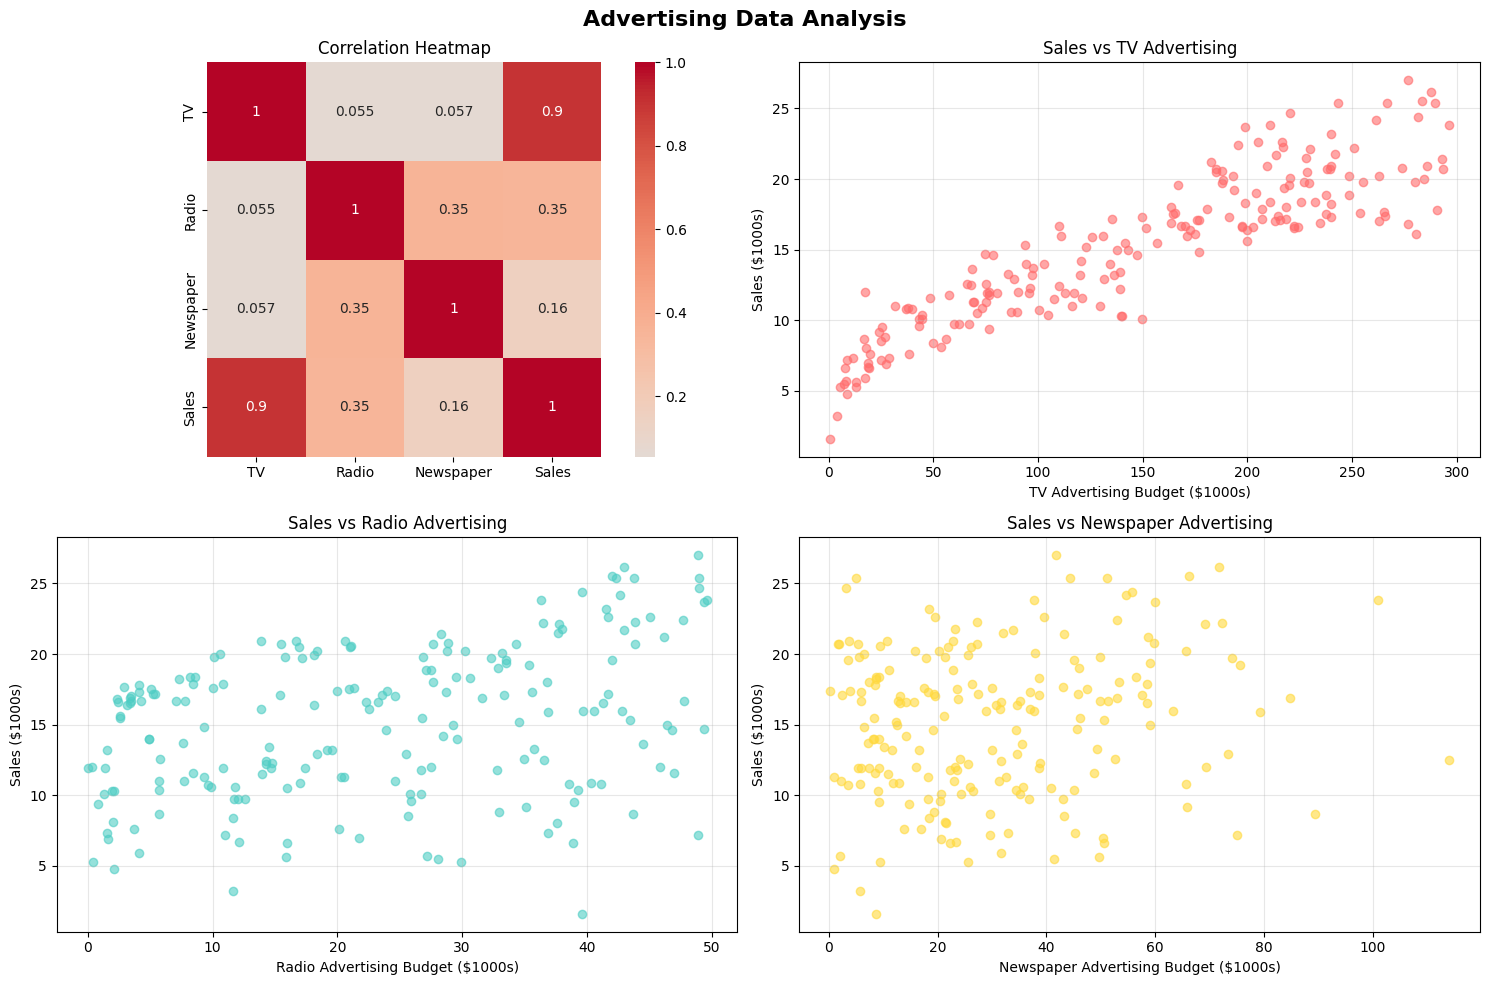

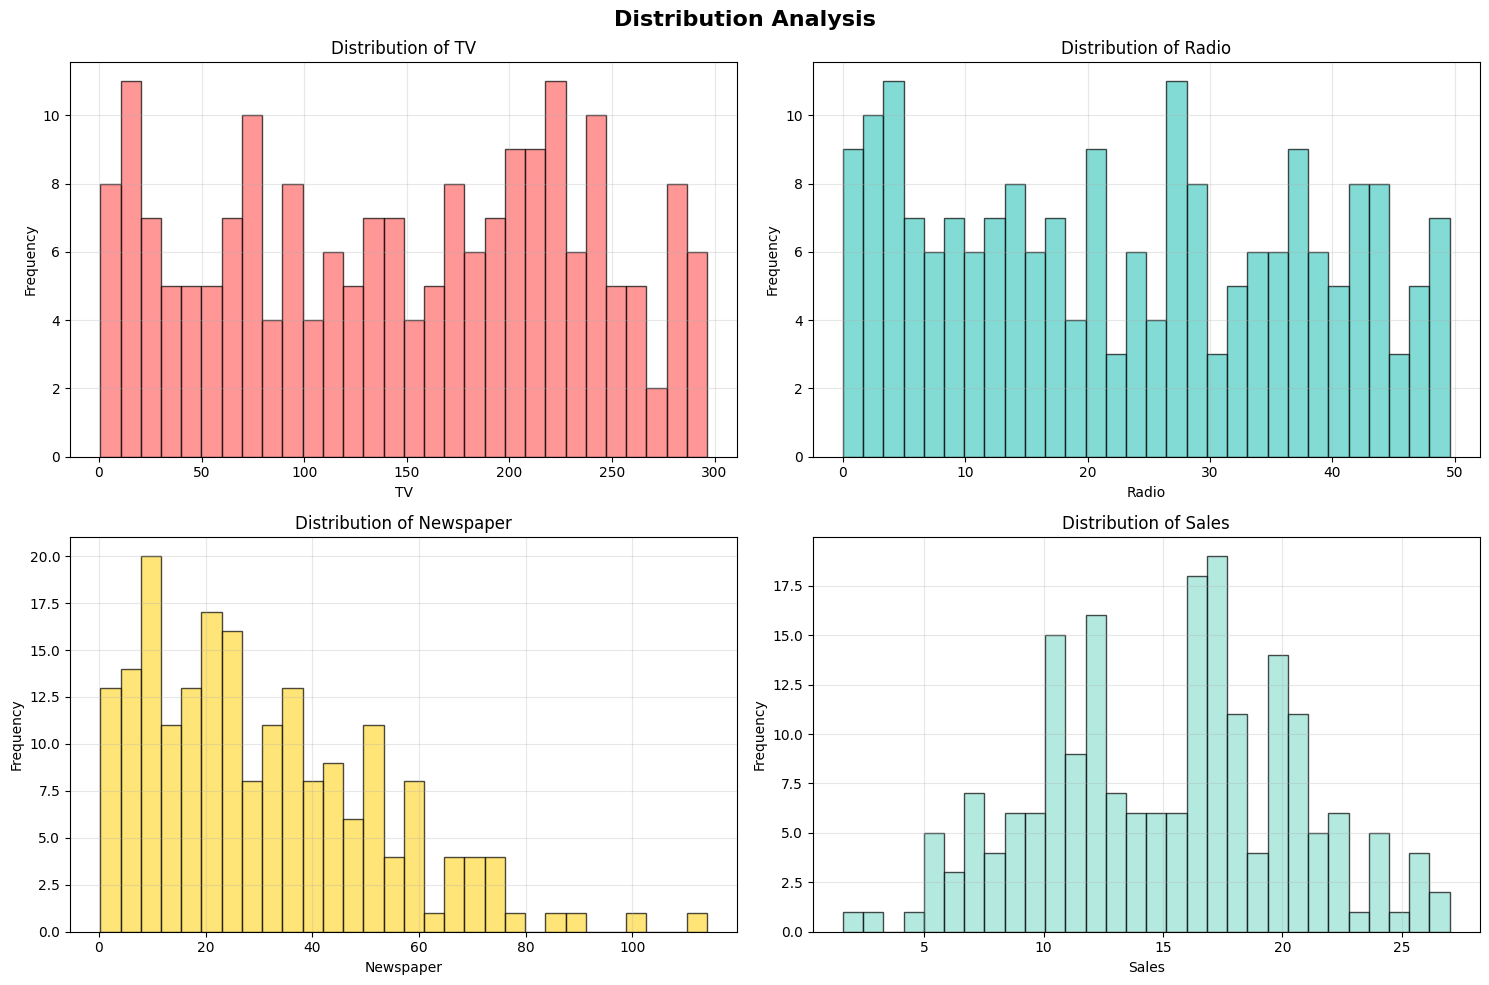


3. DATA PREPARATION
------------------------------------------------------------
Training set size: 160 samples
Testing set size: 40 samples

4. MODEL TRAINING AND EVALUATION
------------------------------------------------------------

Linear Regression:
----------------------------------------
Training R² Score: 0.9001
Testing R² Score: 0.9059
Root Mean Squared Error: $1.705k
Mean Absolute Error: $1.275k
Cross-Validation R² (5-fold): 0.8880 (+/- 0.0211)

Random Forest:
----------------------------------------
Training R² Score: 0.9913
Testing R² Score: 0.9535
Root Mean Squared Error: $1.199k
Mean Absolute Error: $0.918k
Cross-Validation R² (5-fold): 0.9320 (+/- 0.0263)

Gradient Boosting:
----------------------------------------
Training R² Score: 0.9932
Testing R² Score: 0.9594
Root Mean Squared Error: $1.120k
Mean Absolute Error: $0.830k
Cross-Validation R² (5-fold): 0.9232 (+/- 0.0248)

5. FEATURE IMPORTANCE
------------------------------------------------------------

Random For

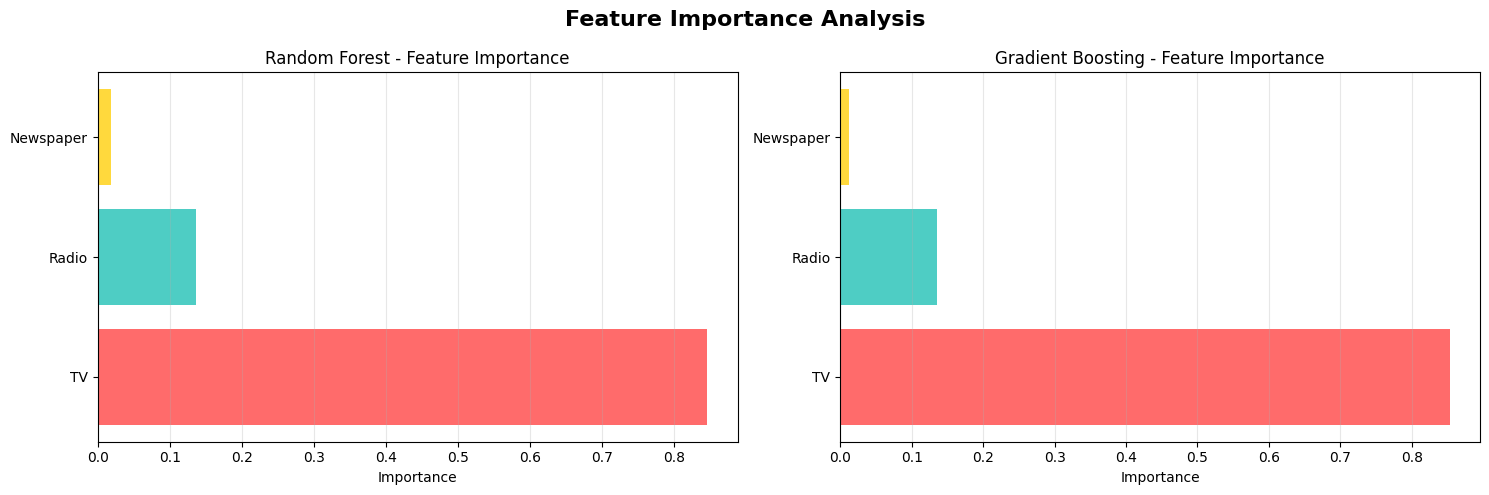


6. MODEL COMPARISON
------------------------------------------------------------
            Model  Train R²  Test R²     RMSE      MAE  CV Score
Linear Regression  0.900142 0.905901 1.705215 1.274826  0.887974
    Random Forest  0.991342 0.953483 1.198930 0.918000  0.931996
Gradient Boosting  0.993212 0.959378 1.120384 0.830120  0.923197


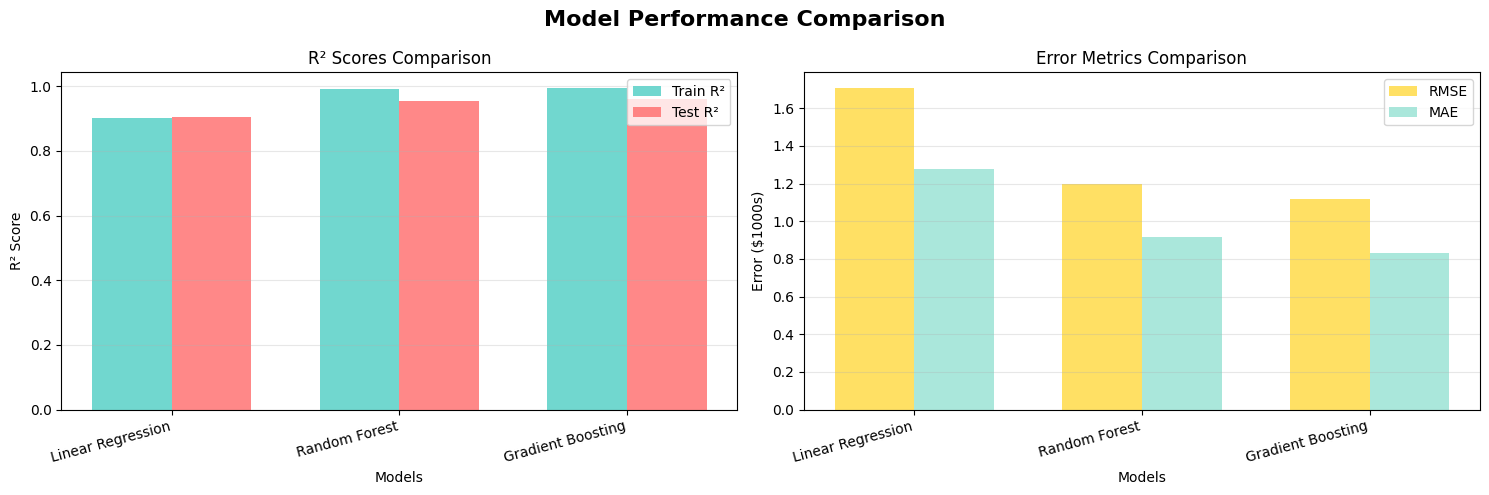


7. BEST MODEL: Gradient Boosting
------------------------------------------------------------
Test R² Score: 0.9594
RMSE: $1.120k


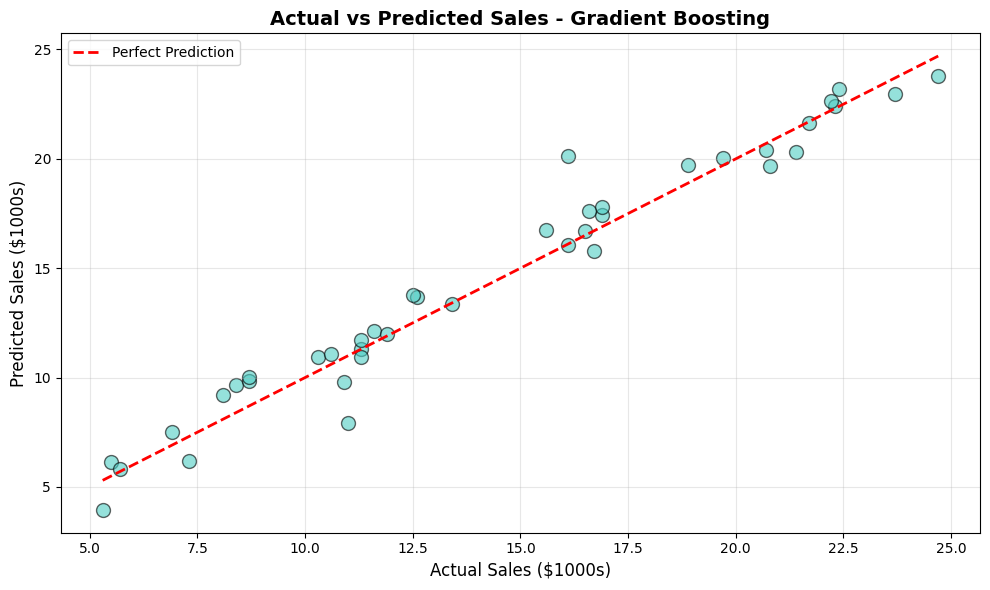


8. EXAMPLE PREDICTIONS
------------------------------------------------------------

Using Gradient Boosting for predictions:

Scenario 1:
  TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k
  Predicted Sales: $22.17k

Scenario 2:
  TV: $100.0k, Radio: $20.0k, Newspaper: $30.0k
  Predicted Sales: $12.41k

Scenario 3:
  TV: $50.0k, Radio: $10.0k, Newspaper: $15.0k
  Predicted Sales: $9.73k


ANALYSIS COMPLETE!

Key Insights:
1. Best performing model: Gradient Boosting
2. Model accuracy (R²): 95.94%
3. Average prediction error: $0.83k
4. Most important feature: TV

Recommendations:
- Focus advertising budget on channels with highest feature importance
- TV advertising shows strongest correlation with sales
- Use this model to optimize advertising spend allocation


In [4]:
df = pd.read_csv('advertising.csv')

print("=" * 60)
print("SALES PREDICTION USING MACHINE LEARNING")
print("=" * 60)

# 1. DATA EXPLORATION
print("\n1. DATASET OVERVIEW")
print("-" * 60)
print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nDataset Info:")
print(df.info())
print(f"\nStatistical Summary:")
print(df.describe())
print(f"\nMissing Values:\n{df.isnull().sum()}")

# 2. CORRELATION ANALYSIS
print("\n2. CORRELATION ANALYSIS")
print("-" * 60)
correlation = df.corr()
print(correlation['Sales'].sort_values(ascending=False))

# 3. DATA VISUALIZATION
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Advertising Data Analysis', fontsize=16, fontweight='bold')

# Correlation heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap')

# Scatter plots for each advertising channel
for idx, col in enumerate(['TV', 'Radio', 'Newspaper']):
    row = (idx + 1) // 2
    col_idx = (idx + 1) % 2
    axes[row, col_idx].scatter(df[col], df['Sales'], alpha=0.6, color=['#FF6B6B', '#4ECDC4', '#FFD93D'][idx])
    axes[row, col_idx].set_xlabel(f'{col} Advertising Budget ($1000s)')
    axes[row, col_idx].set_ylabel('Sales ($1000s)')
    axes[row, col_idx].set_title(f'Sales vs {col} Advertising')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Analysis', fontsize=16, fontweight='bold')

for idx, col in enumerate(df.columns):
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].hist(df[col], bins=30, color=['#FF6B6B', '#4ECDC4', '#FFD93D', '#95E1D3'][idx], 
                             edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. DATA PREPARATION
print("\n3. DATA PREPARATION")
print("-" * 60)

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. MODEL TRAINING AND EVALUATION
print("\n4. MODEL TRAINING AND EVALUATION")
print("-" * 60)

# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 40)
    
    # Train model
    if name == 'Linear Regression':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'rmse': rmse,
        'mae': mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"Training R² Score: {train_r2:.4f}")
    print(f"Testing R² Score: {test_r2:.4f}")
    print(f"Root Mean Squared Error: ${rmse:.3f}k")
    print(f"Mean Absolute Error: ${mae:.3f}k")
    print(f"Cross-Validation R² (5-fold): {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# 6. FEATURE IMPORTANCE (for tree-based models)
print("\n5. FEATURE IMPORTANCE")
print("-" * 60)

for name in ['Random Forest', 'Gradient Boosting']:
    model = results[name]['model']
    importances = model.feature_importances_
    feature_names = X.columns
    
    print(f"\n{name}:")
    for feat, imp in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
        print(f"  {feat}: {imp:.4f}")

# Plot feature importance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')

for idx, name in enumerate(['Random Forest', 'Gradient Boosting']):
    model = results[name]['model']
    importances = model.feature_importances_
    feature_names = X.columns
    
    axes[idx].barh(feature_names, importances, color=['#FF6B6B', '#4ECDC4', '#FFD93D'])
    axes[idx].set_xlabel('Importance')
    axes[idx].set_title(f'{name} - Feature Importance')
    axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# 7. MODEL COMPARISON
print("\n6. MODEL COMPARISON")
print("-" * 60)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'RMSE': [results[m]['rmse'] for m in results.keys()],
    'MAE': [results[m]['mae'] for m in results.keys()],
    'CV Score': [results[m]['cv_mean'] for m in results.keys()]
})

print(comparison_df.to_string(index=False))

# Visualization of model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# R² scores
model_names = list(results.keys())
train_r2_scores = [results[m]['train_r2'] for m in model_names]
test_r2_scores = [results[m]['test_r2'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, train_r2_scores, width, label='Train R²', color='#4ECDC4', alpha=0.8)
axes[0].bar(x + width/2, test_r2_scores, width, label='Test R²', color='#FF6B6B', alpha=0.8)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Scores Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Error metrics
rmse_scores = [results[m]['rmse'] for m in model_names]
mae_scores = [results[m]['mae'] for m in model_names]

axes[1].bar(x - width/2, rmse_scores, width, label='RMSE', color='#FFD93D', alpha=0.8)
axes[1].bar(x + width/2, mae_scores, width, label='MAE', color='#95E1D3', alpha=0.8)
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Error ($1000s)')
axes[1].set_title('Error Metrics Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, rotation=15, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 8. PREDICTION VISUALIZATION (Best Model)
best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
best_model = results[best_model_name]

print(f"\n7. BEST MODEL: {best_model_name}")
print("-" * 60)
print(f"Test R² Score: {best_model['test_r2']:.4f}")
print(f"RMSE: ${best_model['rmse']:.3f}k")

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model['y_pred'], alpha=0.6, color='#4ECDC4', s=100, edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sales ($1000s)', fontsize=12)
plt.ylabel('Predicted Sales ($1000s)', fontsize=12)
plt.title(f'Actual vs Predicted Sales - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. EXAMPLE PREDICTIONS
print("\n8. EXAMPLE PREDICTIONS")
print("-" * 60)

# New advertising budgets to predict
new_data = pd.DataFrame({
    'TV': [230.1, 100.0, 50.0],
    'Radio': [37.8, 20.0, 10.0],
    'Newspaper': [69.2, 30.0, 15.0]
})

predictions = results[best_model_name]['model'].predict(new_data)

print(f"\nUsing {best_model_name} for predictions:\n")
for i, (idx, row) in enumerate(new_data.iterrows()):
    print(f"Scenario {i+1}:")
    print(f"  TV: ${row['TV']}k, Radio: ${row['Radio']}k, Newspaper: ${row['Newspaper']}k")
    print(f"  Predicted Sales: ${predictions[i]:.2f}k\n")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)
print(f"\nKey Insights:")
print(f"1. Best performing model: {best_model_name}")
print(f"2. Model accuracy (R²): {best_model['test_r2']:.2%}")
print(f"3. Average prediction error: ${best_model['mae']:.2f}k")
print(f"4. Most important feature: {max(zip(X.columns, results[best_model_name]['model'].feature_importances_), key=lambda x: x[1])[0]}")
print("\nRecommendations:")
print("- Focus advertising budget on channels with highest feature importance")
print("- TV advertising shows strongest correlation with sales")
print("- Use this model to optimize advertising spend allocation")
print("=" * 60)